# Set up Environment

In [4]:
library(tidyverse)
options(repr.plot.width=2, repr.plot.height=3)

workdir <- "/media/clint/Data/GitRepo/Statistics/BIOS706/Midterm"

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [26]:
theme_Publication <- function(
    base_size=14,
    base_family="Arial") {
      library(grid)
      library(ggthemes)
      (theme_foundation(base_size=base_size, base_family=base_family)
       + theme(plot.title = element_text(face = "bold",
                                         size = rel(1.2), hjust = 0.5),
               text = element_text(),
               panel.background = element_rect(colour = NA),
               plot.background = element_rect(colour = NA),
               panel.border = element_rect(colour = NA),
               axis.title = element_text(face = "bold",size = rel(1)),
               axis.title.y = element_text(angle=90,vjust =2),
               axis.title.x = element_text(vjust = -0.2),
               axis.text = element_text(), 
               axis.line = element_line(colour="black"),
               axis.ticks = element_line(),
               panel.grid.major = element_line(colour="#f0f0f0"),
               panel.grid.minor = element_blank(),
               legend.key = element_rect(colour = NA),
               legend.position = "bottom",
               legend.direction = "horizontal",
               legend.key.size= unit(0.2, "cm"),
               #legend.margin = unit(0, "cm"),
               legend.title = element_text(face="italic"),
               plot.margin=unit(c(10,5,5,5),"mm"),
               strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
               strip.text = element_text(face="bold")
          ))
      
}

# Read in data and Preprocess

In [5]:
dat_frmgham <- read_csv(file.path(workdir, "frmgham2.csv"))
head(dat_frmgham)

Parsed with column specification:
cols(
  .default = col_integer(),
  SYSBP = col_double(),
  DIABP = col_double(),
  BMI = col_double()
)
See spec(...) for full column specifications.


RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,⋯,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
2448,1,195,39,106.0,70.0,0,0,26.97,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2448,1,209,52,121.0,66.0,0,0,NA,0,⋯,1,0,8766,6438,6438,6438,8766,6438,8766,8766
6238,2,250,46,121.0,81.0,0,0,28.73,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6238,2,260,52,105.0,69.5,0,0,29.43,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6238,2,237,58,108.0,66.0,0,0,28.50,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766
9428,1,245,48,127.5,80.0,1,20,25.34,0,⋯,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [6]:
dat <- dat_frmgham
print("Before preprocess")
print(dim(dat))

dat$SEX_LAB      <- c("Men", "Women")[dat$SEX]
dat$DIABETES_LAB <- c("Not a diabetic", "Diabetic")[dat$DIABETES + 1]
dat$CURSMOKE_LAB <- c("Not current smoker", "Current smoker")[dat$CURSMOKE + 1]
dat$PERIOD_LAB   <- c("Period 1", "Period 2", "Period 3")[dat$PERIOD]
dat$AGE_LAB      <- cut(dat$AGE, c(30, 60, 80))

dat              <- dat %>% filter(!is.na(HEARTRTE))
dat_prep         <- dat

print("After preprocess")
print(dim(dat_prep))

[1] "Before preprocess"
[1] 11627    39
[1] "After preprocess"
[1] 11621    44


In [7]:
dat <- dat_prep
dat_per01 <- dat %>% filter(PERIOD == 1)
dat_per02 <- dat %>% filter(PERIOD == 2)

In [10]:
6/11621
# 0.00052
# 0.052%

[1] 0.0005163067

# test characteristics

In [22]:
mytest <- function(dat, feature){
    tmp <- split(dat[[feature]], dat[["DIABETES_LAB"]])
    res <- t.test(tmp$Diabetic, tmp$`Not a diabetic`)
    return(res)
}

In [36]:
# PERIOD 01
features = c(
    "AGE", "HEARTRTE", "SYSBP", "DIABP", 
    "BMI", "GLUCOSE", "TOTCHOL")

for (feature in features){
    res_test <- mytest(dat_per01, feature)
    print(feature)
    print(res_test)
} # end for loop

[1] "AGE"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a diabetic`
t = 8.1264, df = 129.07, p-value = 3.118e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.283226 7.040100
sample estimates:
mean of x mean of y 
 55.42975  49.76809 

[1] "HEARTRTE"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a diabetic`
t = 3.3715, df = 126.97, p-value = 0.0009912
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.537839 5.908105
sample estimates:
mean of x mean of y 
 79.51240  75.78942 

[1] "SYSBP"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a diabetic`
t = 5.8101, df = 123.71, p-value = 4.964e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.45736 21.26371
sample estimates:
mean of x mean of y 
 148.3264  132.4659 

[1] "DIABP"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a d

In [40]:
# PERIOD 02
features = c(
    "AGE", "HEARTRTE", "SYSBP", "DIABP", 
    "BMI", "GLUCOSE", "TOTCHOL")

for (feature in features){
    res_test <- mytest(dat_per02, feature)
    print(feature)
    print(res_test)
}

[1] "AGE"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a diabetic`
t = 7.6275, df = 168.12, p-value = 1.688e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.649298 6.198012
sample estimates:
mean of x mean of y 
 60.14935  55.22570 

[1] "HEARTRTE"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a diabetic`
t = 3.6214, df = 163.81, p-value = 0.0003904
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.857976 6.313398
sample estimates:
mean of x mean of y 
 81.23377  77.14808 

[1] "SYSBP"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a diabetic`
t = 6.5999, df = 161.2, p-value = 5.647e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 10.37371 19.23229
sample estimates:
mean of x mean of y 
 151.1623  136.3593 

[1] "DIABP"

	Welch Two Sample t-test

data:  tmp$Diabetic and tmp$`Not a di

In [51]:
my_prob_test <- function(dat, feature){
    tmp <- split(dat[[feature]], dat[["DIABETES_LAB"]])
    #print(tmp)
    res <- prop.test(
            x = c(sum(tmp$Diabetic==1), sum(tmp$`Not a diabetic`)==1), 
            n = c(length(tmp$Diabetic), length(tmp$`Not a diabetic`)), 
            alternative = "two.sided", 
            correct = FALSE)
    return(res)
}

In [55]:
features <- c("SEX", "CURSMOKE")
for (feature in features){
    res_test <- my_prob_test(dat_per02, feature)
    print(feature)
    print(res_test)
}

Warning message in prop.test(x = c(sum(tmp$Diabetic == 1), sum(tmp$`Not a diabetic`) == :
“Chi-squared approximation may be incorrect”

[1] "SEX"

	2-sample test for equality of proportions without continuity
	correction

data:  c(sum(tmp$Diabetic == 1), sum(tmp$`Not a diabetic`) == 1) out of c(length(tmp$Diabetic), length(tmp$`Not a diabetic`))
X-squared = 1848.8, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.4016102 0.5594287
sample estimates:
   prop 1    prop 2 
0.4805195 0.0000000 



Warning message in prop.test(x = c(sum(tmp$Diabetic == 1), sum(tmp$`Not a diabetic`) == :
“Chi-squared approximation may be incorrect”

[1] "CURSMOKE"

	2-sample test for equality of proportions without continuity
	correction

data:  c(sum(tmp$Diabetic == 1), sum(tmp$`Not a diabetic`) == 1) out of c(length(tmp$Diabetic), length(tmp$`Not a diabetic`))
X-squared = 1317, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.2691205 0.4191911
sample estimates:
   prop 1    prop 2 
0.3441558 0.0000000 



# Aim 1
**Describe the distribution of heart rate and diabetes and test for the association of heart rate and diabetes in Period 1.**

In [13]:
dat <- dat_prep
dat_per01 <- dat %>% 
    filter(PERIOD == 1) %>%
    select(HEARTRTE, DIABETES, DIABETES2, SEX, SEX2)

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

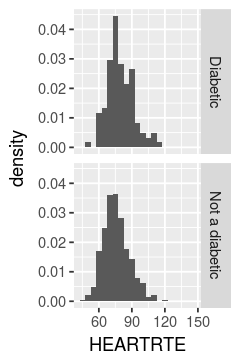

In [18]:
options(repr.plot.width=2, repr.plot.height=3)

dat_per01 %>% 
    ggplot(aes(x = HEARTRTE)) + 
    geom_histogram(
        aes(y = ..density..),
        binwidth = 5) +
    facet_grid(DIABETES2~., scales = "fixed")

In [10]:
dat <- dat_per01
dat <- split(dat$HEARTRTE, dat$DIABETES2)
t.test(dat$`Not a diabetic`, dat$Diabetic)


	Welch Two Sample t-test

data:  dat$`Not a diabetic` and dat$Diabetic
t = -3.3715, df = 126.97, p-value = 0.0009912
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.908105 -1.537839
sample estimates:
mean of x mean of y 
 75.78942  79.51240 


# Aim 2
**Describe the distribution of heart rate and diabetes by age and sex and test for the association heart rate and diabetes by age in Period 1.**

In [1]:
1884+59

[1] 1943

In [2]:
2428+62

[1] 2490

**Test**

In [21]:
dat <- table(dat_per01$SEX_LAB, dat_per01$DIABETES_LAB)

res1 <- chisq.test(dat)
res2 <- fisher.test(dat)

print(res1)
cat("++++++++++++++++\n")
res$expected
cat("===================\n")
print(res2)
cat("++++++++++++++++\n")
#res$expected


	Pearson's Chi-squared test with Yates' continuity correction

data:  dat
X-squared = 1.0308, df = 1, p-value = 0.31

++++++++++++++++


,Diabetic,Not a diabetic
Men,53.03474,1889.965
Women,67.96526,2422.035



	Fisher's Exact Test for Count Data

data:  dat
p-value = 0.3069
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8392993 1.7902619
sample estimates:
odds ratio 
  1.226326 

++++++++++++++++


In [22]:
dat <- table(dat_per01$AGE_LAB, dat_per01$DIABETES_LAB)
res1 <- chisq.test(dat)
res2 <- fisher.test(dat)

print(res1)
cat("++++++++++++++++\n")
res$expected
cat("===================\n")
print(res2)
cat("++++++++++++++++\n")
#res$expected


	Pearson's Chi-squared test with Yates' continuity correction

data:  dat
X-squared = 30.834, df = 1, p-value = 2.811e-08

++++++++++++++++


,Diabetic,Not a diabetic
Men,53.03474,1889.965
Women,67.96526,2422.035



	Fisher's Exact Test for Count Data

data:  dat
p-value = 3.607e-07
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.2281899 0.5160752
sample estimates:
odds ratio 
 0.3408142 

++++++++++++++++


**Plotting**

In [49]:
dat <- dat_prep

dat_per01 <- dat %>% 
    filter(PERIOD == 1) %>%
    select(HEARTRTE, DIABETES, DIABETES2, SEX, SEX2, AGE)

dat_per01$AGE2 <- cut(dat_per01$AGE, c(30, 40, 50, 65, 70, 80))

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

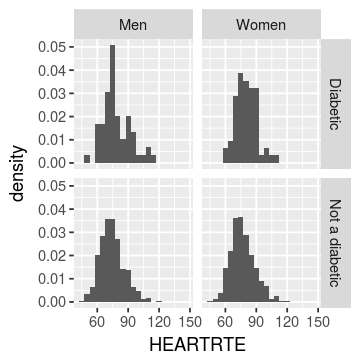

In [21]:
options(repr.plot.width=3, repr.plot.height=3)

dat_per01 %>% 
    ggplot(aes(x = HEARTRTE)) + 
    geom_histogram(
        aes(y = ..density..),
        binwidth = 5) +
    facet_grid(DIABETES2~SEX2, scales = "fixed")

In [69]:
dat <- dat_per01
dat <- dat %>% 
    group_by(DIABETES2, SEX2, AGE2) %>%
    summarize(Mean_HEARTRTE = mean(HEARTRTE, na.rm = TRUE))

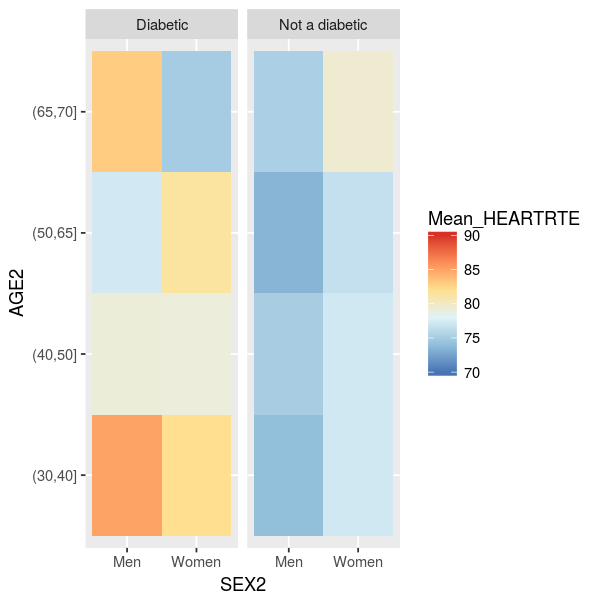

In [66]:
options(repr.plot.width=5, repr.plot.height=5)

# set color scale
sc <- scale_fill_distiller(
    palette="RdYlBu", direction=-1,
    limits=c(70,90))

dat %>% 
    ggplot(aes(x = SEX2, y = AGE2, fill = Mean_HEARTRTE)) + 
    sc + 
    geom_tile() +
    facet_grid(~DIABETES2, scales = "fixed")

[1] 32 70

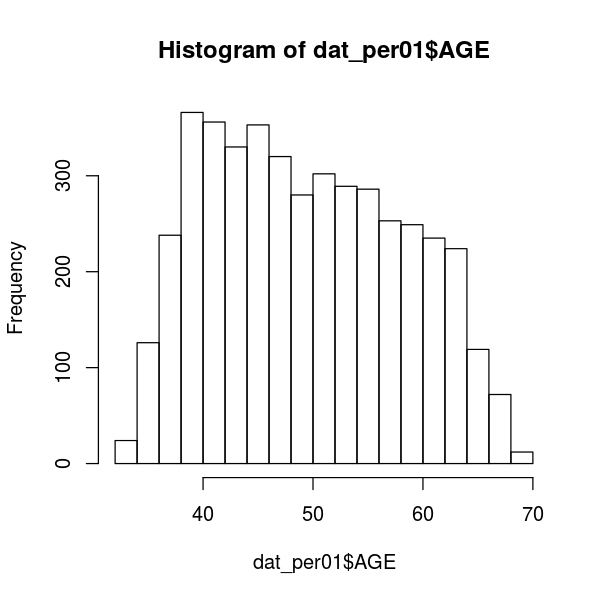

In [45]:
range(dat_per01$AGE)
hist(dat_per01$AGE)

# Aim 3
**Test the association of heart rate at Period 1 and incidence of diabetes in Period 2.**

In [24]:
dat1 <- dat_per01
dat2 <- dat_per02
dat_per12 <- dat_prep %>% filter(PERIOD %in% c(1, 2))

In [34]:
t.test(dat1$HEARTRTE, dat2$HEARTRTE)


	Welch Two Sample t-test

data:  dat1$HEARTRTE and dat2$HEARTRTE
t = -5.1881, df = 8116.2, p-value = 2.176e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.9526355 -0.8817175
sample estimates:
mean of x mean of y 
 75.89104  77.30822 


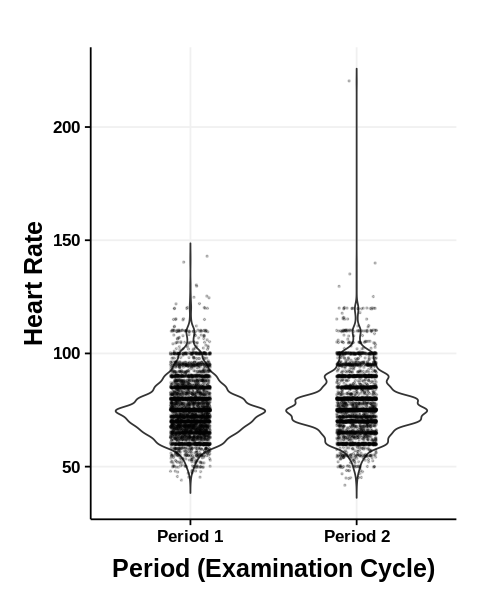

In [33]:
options(repr.plot.width=4, repr.plot.height=5)

dat <- dat_per12 #%>% filter(HEARTRTE < 200)
dat$PERIOD_LAB <- factor(dat$PERIOD_LAB)

gp <- dat %>% 
    ggplot(aes(y = HEARTRTE, x=PERIOD_LAB)) +
    geom_violin(trim = FALSE, adjust = 1.1) +
    geom_jitter(
        size = 0.3, 
        width = 0.12,
        alpha = 0.2) +
    ylab("Heart Rate") + 
    xlab("Period (Examination Cycle)") +
    theme_Publication() +
    theme(
        plot.title  = element_text(hjust = 0.5),
        axis.title  = element_text(size=15, face="bold"),
        axis.text.y = element_text(size=10, face="bold"),
        axis.text.x = element_text(size=10, face="bold"))#,
            #angle=90, hjust=1, vjust=0.4))

print(gp)

In [ ]:
dat <- dat_per12
dat$HEARTRTE

In [100]:
dat <- dat_per12 #%>% filter(HEARTRTE < 200)
dat <- split(dat$HEARTRTE, dat$PERIOD)
t.test(dat$`1`, dat$`2`)


	Welch Two Sample t-test

data:  dat$`1` and dat$`2`
t = -5.1881, df = 8116.2, p-value = 2.176e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.9526355 -0.8817175
sample estimates:
mean of x mean of y 
 75.89104  77.30822 
